In [50]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline


In [67]:
#read data and display the first 5 rows

auto_df = pd.read_excel("/content/Sales_Data.xlsx")

auto_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,43155,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,43227,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,43282,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,43337,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,43401,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [52]:
#Show the number of records in the data
auto_df.shape


(2747, 20)

In [53]:
#View data information....data types for columns
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   int64  
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

The data constitutes of the following data types;
1. 6 columns with int64 data types
2. 2 columns with float64 data types
3. The remaining columns have object data type



# Exploratory Data Analysis

In [54]:
#display column names
auto_df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [55]:
#Check null values
null_counts = auto_df.isnull().sum()
print(null_counts)

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64


There are no null values in the data set

In [56]:
#to make EDA easier we drop some fields and convert date fields to date format
temp = ['PHONE','ADDRESSLINE1', 'CITY', 'POSTALCODE', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME']
auto_df.drop(temp, axis=1, inplace=True)

In [57]:
#generate sumary statistics of the data
auto_df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098951,6.491081,3553.047583,43598.914088,1757.085912,100.691664
std,91.877521,9.762135,42.042548,4.230544,1838.953901,230.231295,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,43106.000000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,43412.000000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,43640.000000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,43786.000000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,43982.000000,3562.000000,214.000000


In [28]:
auto_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,43155,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,USA,Small
1,10121,34,81.35,5,2765.90,43227,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,France,Small
2,10134,41,94.74,2,3884.34,43282,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,France,Medium
3,10145,45,83.26,6,3746.70,43337,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,USA,Medium
4,10168,36,96.66,1,3479.76,43401,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,USA,Medium


# Univariate Data **Analysis**

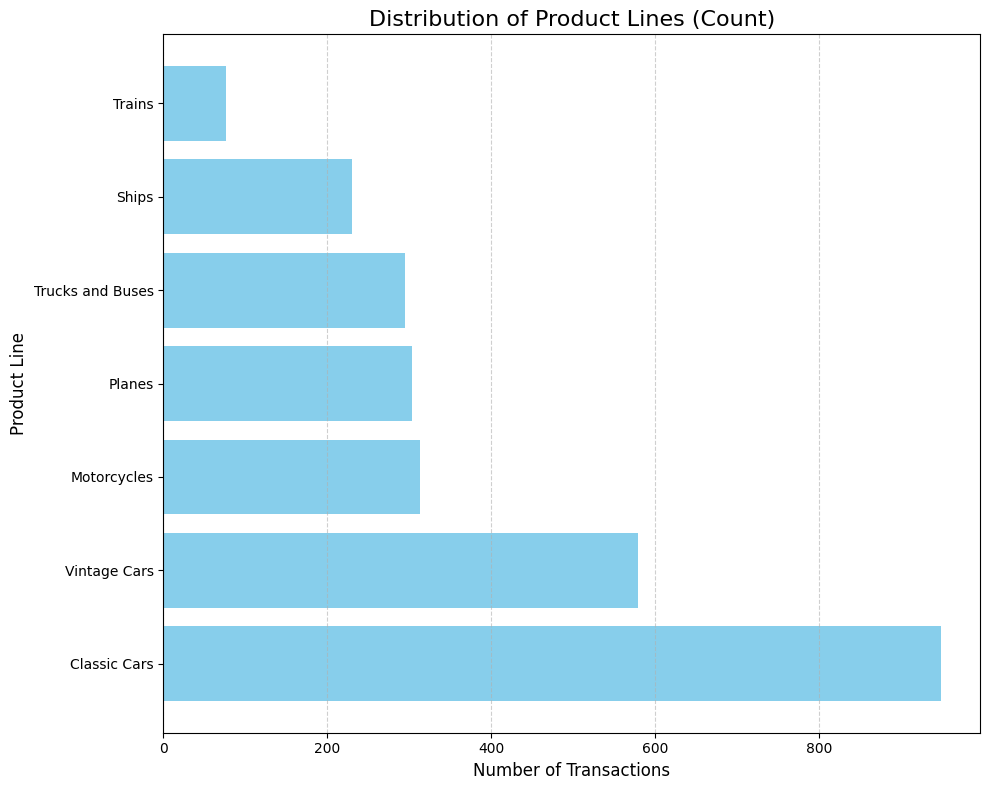

In [59]:
#Generate a bar chart showing the distribution of product lines
product_line_counts = auto_df['PRODUCTLINE'].value_counts().reset_index()
product_line_counts.columns = ['PRODUCTLINE', 'Count']

# 3. Generate the HORIZONTAL bar chart
plt.figure(figsize=(10, 8))
# Use barh, plotting Count on the x-axis and PRODUCTLINE on the y-axis
plt.barh(product_line_counts['PRODUCTLINE'], product_line_counts['Count'], color='#87CEEB')

plt.title('Distribution of Product Lines (Count)', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Product Line', fontsize=12)
plt.yticks(rotation=0) # Ensures y-axis labels are horizontal
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('product_line_distribution_horizontal_bar_chart.png')
plt.show()

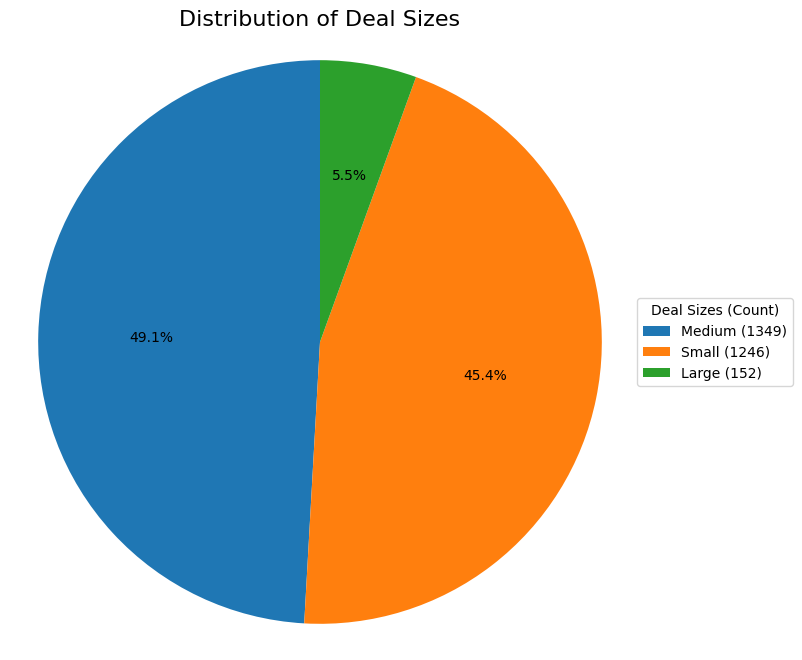

In [63]:
#generate a pie chart showing the dealsize distribution
dealsize_counts = auto_df['DEALSIZE'].value_counts().reset_index()
dealsize_counts.columns = ['DEALSIZE', 'Count']

# Create a combined label for the legend
dealsize_counts['Legend_Label'] = dealsize_counts['DEALSIZE'] + ' (' + dealsize_counts['Count'].astype(str) + ')'

# 2. Generate the PIE chart
plt.figure(figsize=(8, 8))

# Create the pie chart and capture wedges for the legend
wedges, texts, autotexts = plt.pie(
    dealsize_counts['Count'],
    autopct='%1.1f%%',  # Show percentage on slices (1 decimal place)
    startangle=90,      # Start the chart at the top
    textprops={'fontsize': 10}
)

# Add a Legend with the custom labels
plt.legend(
    wedges,
    dealsize_counts['Legend_Label'],
    title="Deal Sizes (Count)",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1) # Position the legend outside the chart
)

# Ensure the pie chart is circular
plt.axis('equal')

plt.title('Distribution of Deal Sizes', fontsize=16)
plt.show()

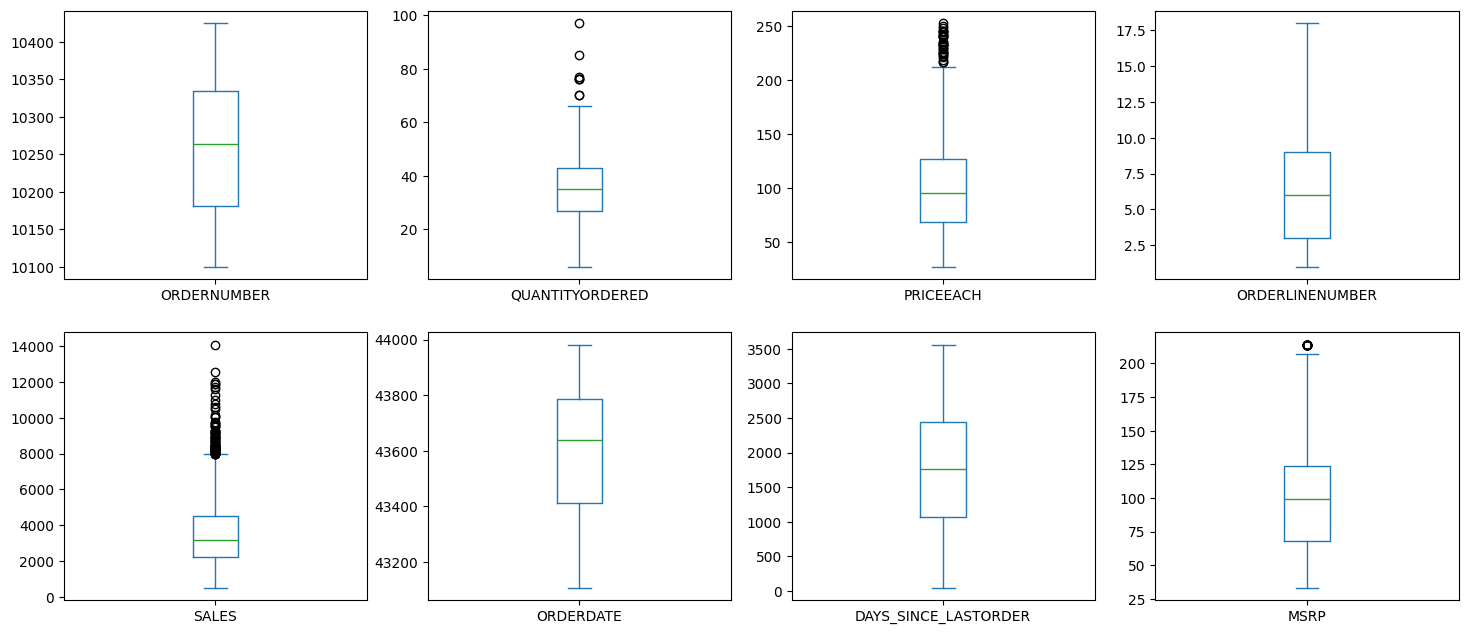

In [30]:
#generate box plots for numarical variables to see how the values are distributed
plt.rcParams['figure.figsize'] = [18,16]
auto_df.plot(kind="box", subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

Most of the values are distributed normally around the mean apart from QUANTITYORDERED, PRICEEACH and SALES which have outliers

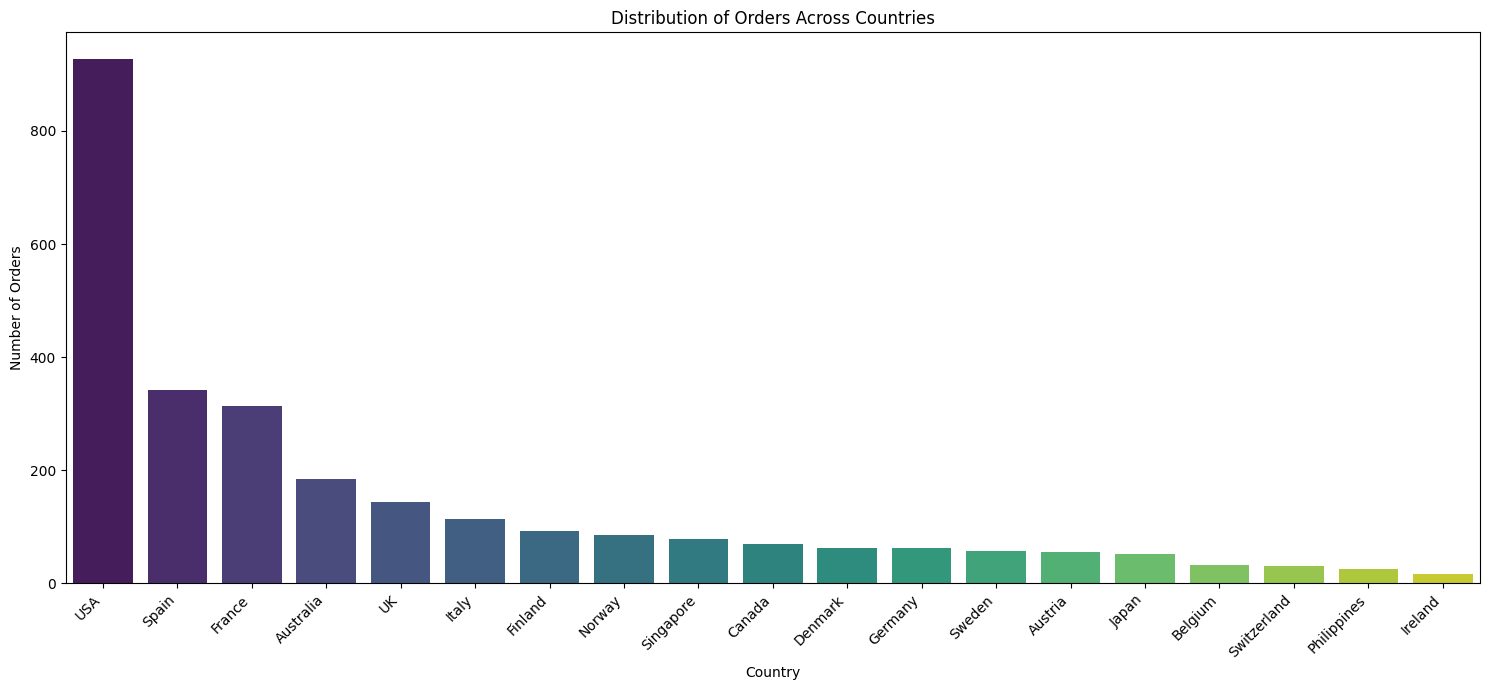

In [31]:
country_order_counts = auto_df['COUNTRY'].value_counts().reset_index()
country_order_counts.columns = ['Country', 'Order_Count']

plt.figure(figsize=(15, 7))
sns.barplot(x='Country', y='Order_Count', data=country_order_counts, palette='viridis', hue='Country', legend=False)
plt.title('Distribution of Orders Across Countries')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Most of the orders are coming from the USA followed Spain, France and Australia in that order

In [32]:
#Generate a table showing how the orders are distibuted across counties in percantages
country_order_counts['Percentage'] = (country_order_counts['Order_Count'] / country_order_counts['Order_Count'].sum()) * 100
display(country_order_counts.sort_values(by='Percentage', ascending=False))

,Country,Order_Count,Percentage
0,USA,928,33.782308
1,Spain,342,12.449945
2,France,314,11.430652
3,Australia,185,6.734620
4,UK,144,5.242082
5,Italy,113,4.113578
6,Finland,92,3.349108
7,Norway,85,3.094285
8,Singapore,79,2.875865
9,Canada,70,2.548234


Ordesr from the USA constitute of 33.78% of the orders placed. Ireland has the fewest orders constituting of 0.58%

In [33]:
#show the value counts for unique values under 'STATUS', 'PRODUCTLINE' and 'DEALSIZE'
display(auto_df['STATUS'].value_counts())

,count
STATUS,
Shipped,2541
Cancelled,60
Resolved,47
On Hold,44
In Process,41
Disputed,14


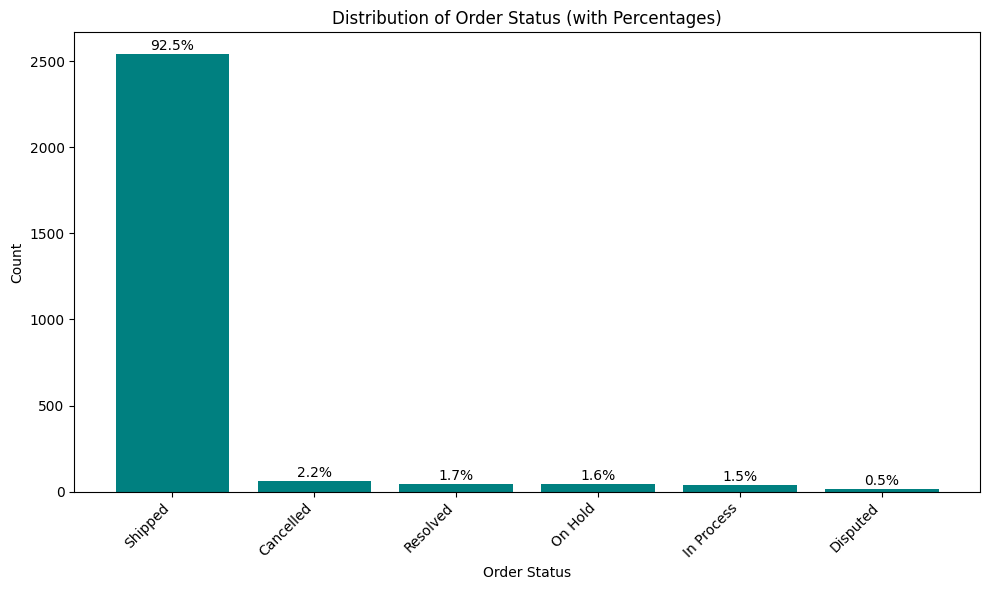

In [34]:
#generate a chart showing the percentage of each status
status_counts = auto_df['STATUS'].value_counts().reset_index()
status_counts.columns = ['STATUS', 'Count']

# Calculate percentages
total_count = status_counts['Count'].sum()
status_counts['Percentage'] = (status_counts['Count'] / total_count) * 100

plt.figure(figsize=(10, 6))
bars = plt.bar(status_counts['STATUS'], status_counts['Count'], color='teal')

# Set labels and title
plt.title('Distribution of Order Status (with Percentages)')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate status names for better readability

# Annotate with Percentages
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage_value = status_counts['Percentage'].iloc[i]

    plt.text(bar.get_x() + bar.get_width() / 2.,
             height + (total_count * 0.002), # Position text slightly above the bar, scaled to total
             f'{percentage_value:.1f}%',
             ha='center',
             va='bottom',
             fontsize=10)

plt.tight_layout()
plt.savefig('status_bar_chart_with_percentages.png')
plt.show()

the shipped orders consist of 92,5 percent of all the orders

In [35]:
display(auto_df['PRODUCTLINE'].value_counts())



,count
PRODUCTLINE,
Classic Cars,949
Vintage Cars,579
Motorcycles,313
Planes,304
Trucks and Buses,295
Ships,230
Trains,77


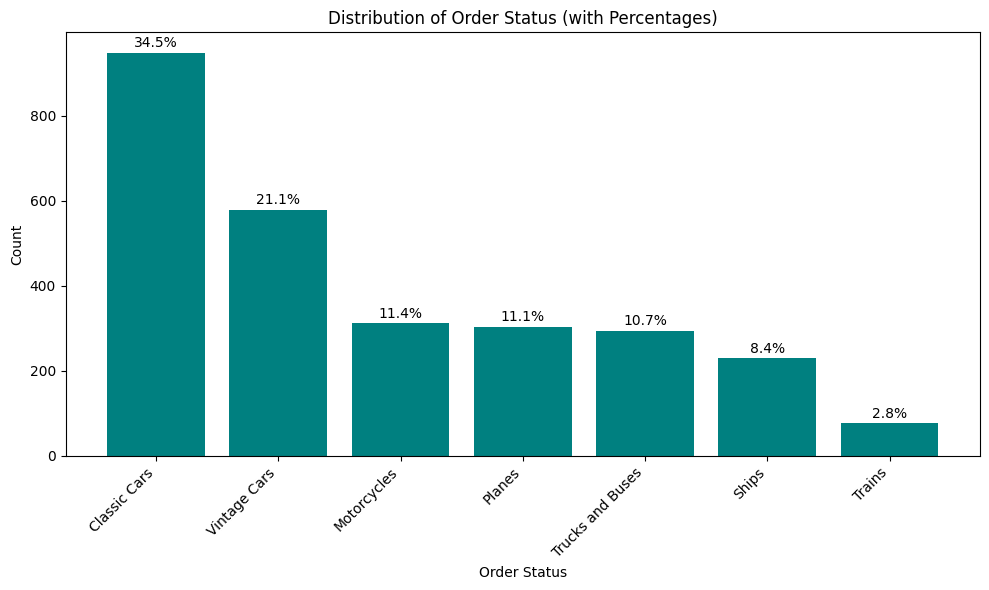

In [36]:
#generate a chart showing the percentage of each product line
status_counts = auto_df['PRODUCTLINE'].value_counts().reset_index()
status_counts.columns = ['PRODUCTLINE', 'Count']

# Calculate percentages
total_count = status_counts['Count'].sum()
status_counts['Percentage'] = (status_counts['Count'] / total_count) * 100

plt.figure(figsize=(10, 6))
bars = plt.bar(status_counts['PRODUCTLINE'], status_counts['Count'], color='teal')

# Set labels and title
plt.title('Distribution of Order Status (with Percentages)')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate status names for better readability

# Annotate with Percentages
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage_value = status_counts['Percentage'].iloc[i]

    plt.text(bar.get_x() + bar.get_width() / 2.,
             height + (total_count * 0.002), # Position text slightly above the bar, scaled to total
             f'{percentage_value:.1f}%',
             ha='center',
             va='bottom',
             fontsize=10)

plt.tight_layout()
plt.savefig('status_bar_chart_with_percentages.png')
plt.show()

Classic cars constitute of 34.5%, Vintage are 21.1% and Motocycles are 11.4 percent. The productline with least products is Trains at 2.8%.

In [37]:
display(auto_df['DEALSIZE'].value_counts())

,count
DEALSIZE,
Medium,1349
Small,1246
Large,152


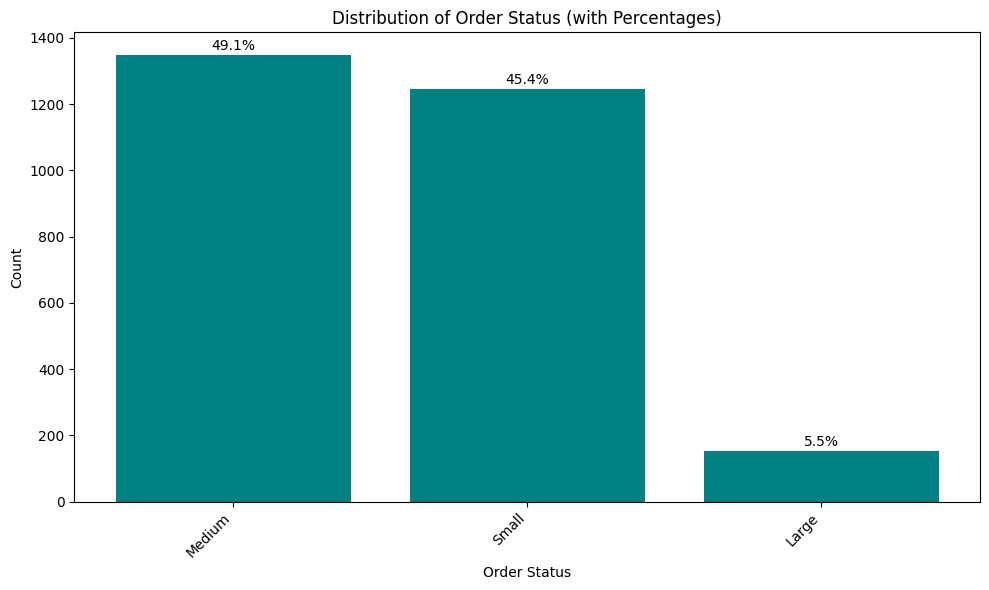

In [38]:
#generate a chart showing the percentage of each DEALSIZE
status_counts = auto_df['DEALSIZE'].value_counts().reset_index()
status_counts.columns = ['DEALSIZE', 'Count']

# Calculate percentages
total_count = status_counts['Count'].sum()
status_counts['Percentage'] = (status_counts['Count'] / total_count) * 100

plt.figure(figsize=(10, 6))
bars = plt.bar(status_counts['DEALSIZE'], status_counts['Count'], color='teal')

# Set labels and title
plt.title('Distribution of Order Status (with Percentages)')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate status names for better readability

# Annotate with Percentages
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage_value = status_counts['Percentage'].iloc[i]

    plt.text(bar.get_x() + bar.get_width() / 2.,
             height + (total_count * 0.002), # Position text slightly above the bar, scaled to total
             f'{percentage_value:.1f}%',
             ha='center',
             va='bottom',
             fontsize=10)

plt.tight_layout()
plt.savefig('status_bar_chart_with_percentages.png')
plt.show()

The Large orders are very few constituting of 5.5% while Medium and Small constitute 49.1% and 45.4% respectively.

In [75]:
#convert the ORDERDATE to a date variable
# Ensure ORDERDATE is numeric (Excel serial number) before conversion
# This handles cases where it might have been incorrectly converted to datetime before
auto_df['ORDERDATE'] = pd.to_numeric(auto_df['ORDERDATE'], errors='coerce')

# Now convert the numeric Excel serial number to datetime
auto_df['ORDERDATE'] = pd.to_datetime(auto_df['ORDERDATE'], unit='D', origin='1899-12-30')
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

# Bivariate Analysis

In [76]:
#aggregate orders for each year
auto_df['YEAR'] = auto_df['ORDERDATE'].dt.year
auto_df['YEAR'].value_counts()

,count
YEAR,
2019,1329
2018,953
2020,465


Order Counts by Year (Used for Chart):
YEAR
2018     953
2019    1329
2020     465
order_count_line_chart.png


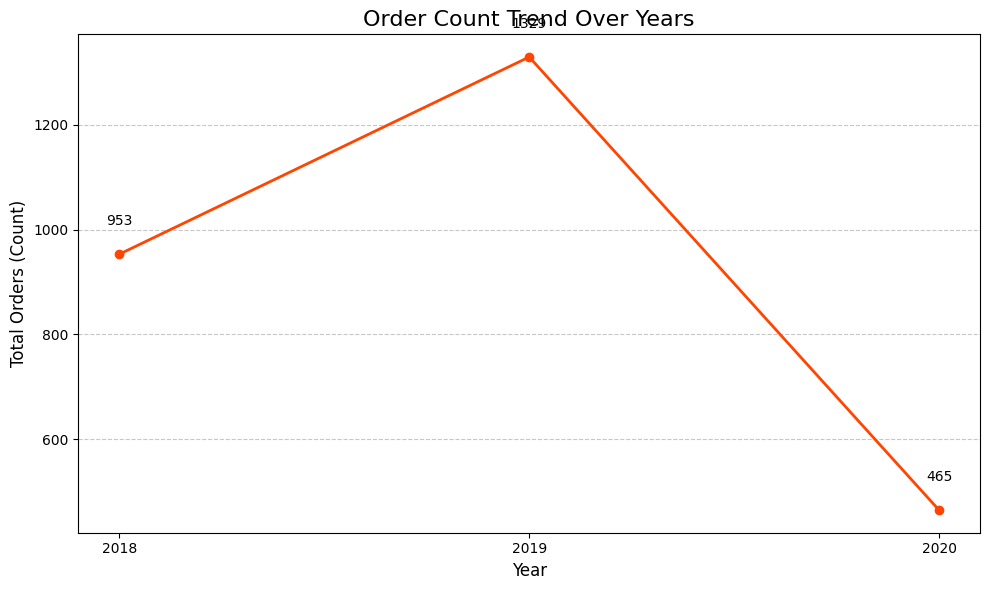

In [78]:

# 1. Get the count of orders for each year and sort by year
year_order_counts = auto_df['YEAR'].value_counts().sort_index()

# --- Line Chart Generation ---
plt.figure(figsize=(10, 6))

# Plot the line chart using the sorted year counts
plt.plot(
    year_order_counts.index,      # Years for x-axis
    year_order_counts.values,     # Counts for y-axis
    marker='o',         # Add circles at each data point
    linestyle='-',      # Use a solid line
    color='#FF4500',    # Use a distinct color (e.g., Orange-Red)
    linewidth=2
)

# Add titles and labels
plt.title('Order Count Trend Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Orders (Count)', fontsize=12)

# Ensure the x-axis ticks are set only for the existing years
plt.xticks(year_order_counts.index)

# Add data labels for clarity
for year, count in year_order_counts.items():
    plt.text(year, count + 50,
             str(count),
             ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

output_image_name = 'order_count_line_chart.png'
plt.savefig(output_image_name)

# Print the sorted data used for the chart
print("Order Counts by Year (Used for Chart):")
print(year_order_counts.to_string())
print(output_image_name)

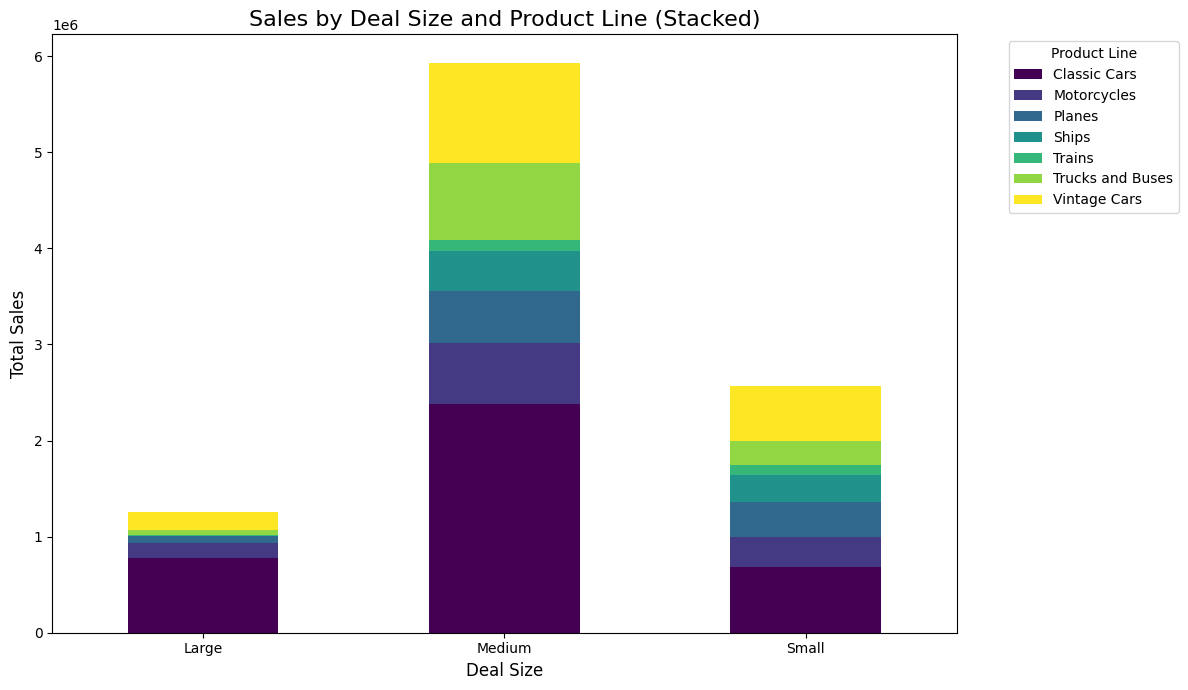

In [84]:
#generate a Stacked Bar Chart for sales, productline and dealsize
# 1. Aggregate the data for stacking
# Group by DEALSIZE and PRODUCTLINE, summing the SALES
stacked_data = auto_df.groupby(['DEALSIZE', 'PRODUCTLINE'])['SALES'].sum().unstack()

# 2. Generate the Stacked Bar Chart
plt.figure(figsize=(12, 7))

# Plot the stacked data directly from the aggregated DataFrame
stacked_data.plot(
    kind='bar',
    stacked=True,
    ax=plt.gca(),
    colormap='viridis' # Using the 'viridis' color map from the original snippet
)

# Set labels and title
plt.title('Sales by Deal Size and Product Line (Stacked)', fontsize=16)
plt.xlabel('Deal Size', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Rotate X-axis labels to be vertical (default for bar charts)
plt.xticks(rotation=0)

# Adjust the legend title and position
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('stacked_sales_by_dealsize_productline.png')


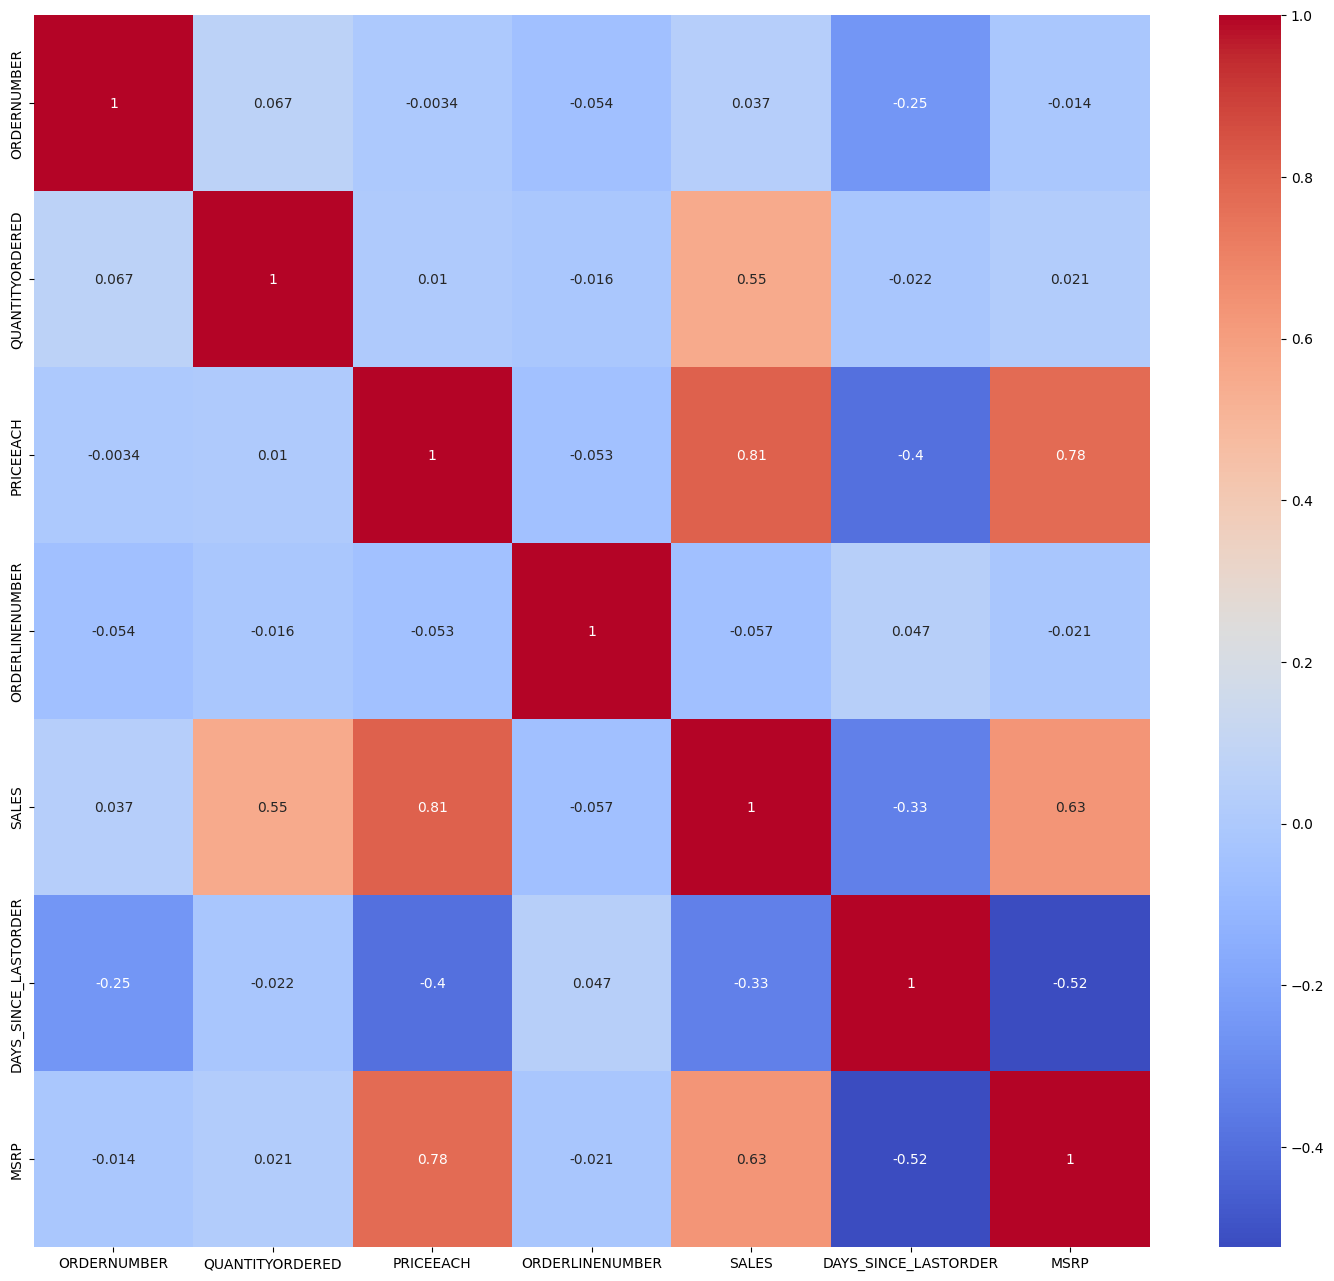

In [40]:
numeric_df = auto_df.select_dtypes(include=np.number)
corr = numeric_df.corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='coolwarm')
plt.rcParams['figure.figsize'] = [12, 10]
plt.show()

1. There is a fair correlation (0.81) between PRICEEACH and SALES as well as PRICEEACH and MSRP (0.78)
2. SALES and MSRP have a correlation of 0.63
3. SALES and QUANTITYORDERED have a correlation of 0.55.

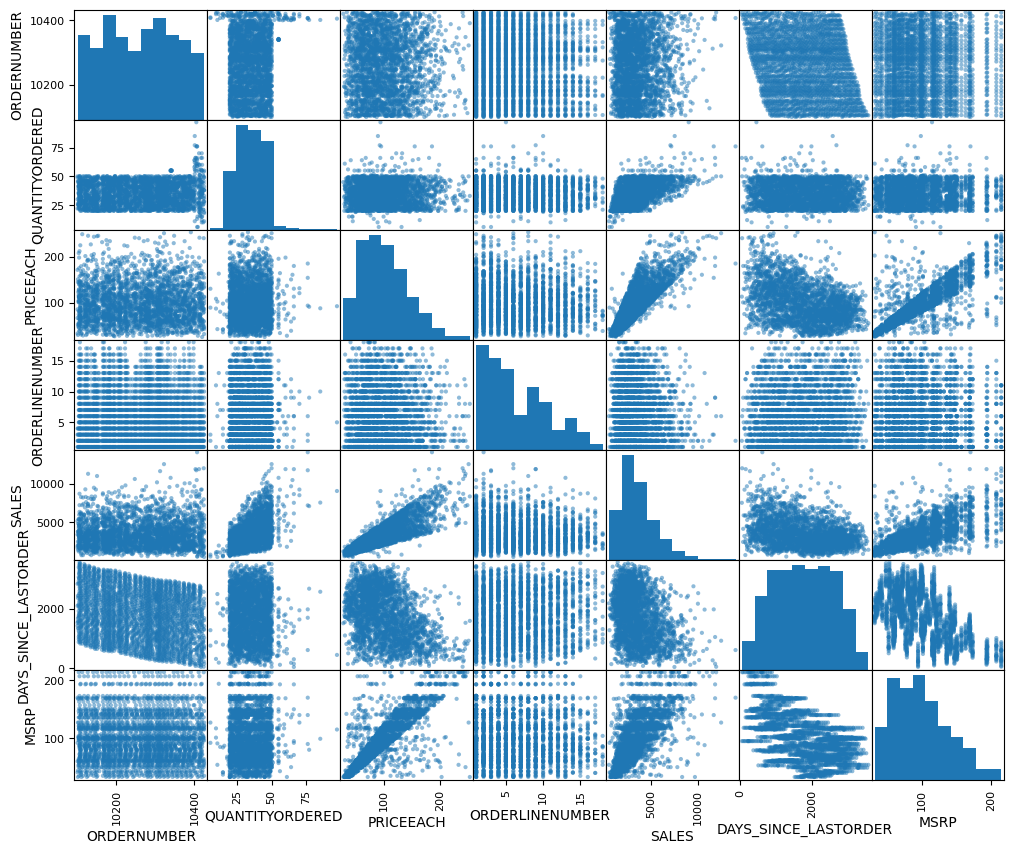

In [41]:
#We generate a scatter matrix
scatter_matrix(auto_df)
plt.show()